# Jurnal Modul 2

## Menyusun penglihatan adit berikut menjadi satu gambar utuh  

code berikut merupakan library yang dipakai pada jurnal modul 1 ini.
1.import numpy berfungsi sebagai menampilkan nilai matriks yang berbentuk array
2.import matplotlib/plt berfungsi sebagai menampilkan sebbuah histogram yang ada dibawah
3.import cv2 berfungsi untuk menampilkan gambar pada python
4.import matplotlib.image as mpimg berfungsi untuk menampilkan gambar yang di import ke dalam python

In [596]:
import matplotlib.pyplot as plt
import matplotlib.image as img 
import cv2 as cv
import numpy as np

mengubah citra menjadi grayscale

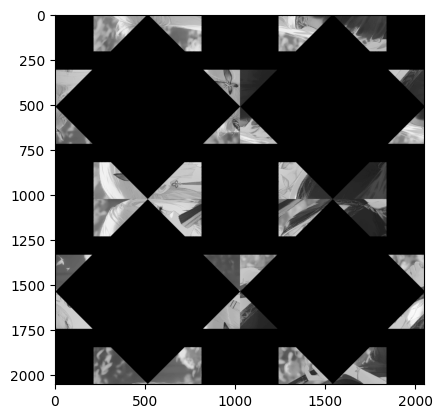

In [597]:
image = img.imread("senheScramble.jpg")
plt.imshow(image, cmap="gray")
plt.show()


pecah citra menjadi 4 bagian

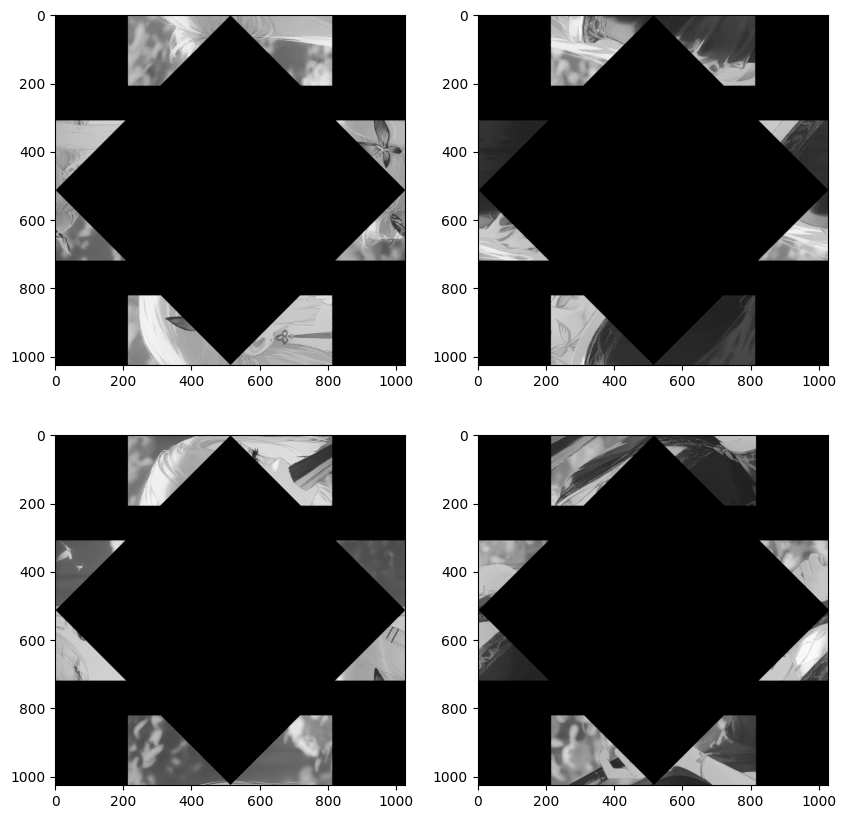

In [598]:
image = img.imread("senheScramble.jpg")

# Menentukan tinggi dan lebar gambar
tinggi = image.shape[0]
lebar = image.shape[1]
# Membagi gambar menjadi 4 bagian
bagian1 = image[:tinggi//2, :lebar//2]
bagian2 = image[:tinggi//2, lebar//2:]
bagian3 = image[tinggi//2:, :lebar//2]
bagian4 = image[tinggi//2:, lebar//2:]

# Menampilkan gambar
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(bagian1, cmap="gray")
plt.subplot(222)
plt.imshow(bagian2, cmap="gray")
plt.subplot(223)
plt.imshow(bagian3, cmap="gray")
plt.subplot(224)
plt.imshow(bagian4, cmap="gray")
plt.show()


lakukan translasi dari range pecahan citra yang ada

In [599]:
def Translasi(image, shift):
    tinggi, lebar = image.shape
    hasiltl = np.zeros((tinggi, lebar)).astype(int)

    for i in range(0, 207):
        for j in range(200, 820):
            if not 0 <= image[i, j] <= 20:
                hasiltl[i + shift, j] = image[i, j]
    for i in range(800, tinggi):
        for j in range(200, 820):
            if not 0 <= image[i, j] <= 20:
                hasiltl[i - shift, j] = image[i, j]
        
    for i in range(300, 720):
        for j in range(0, 210):
            if not 0 <= image[i, j] <= 20:
                hasiltl[i, j + shift] = image[i, j]
        
    for i in range(300, 720):
        for j in range(820, lebar):
            if not 0 <= image[i, j] <= 20:
                hasiltl[i, j - shift] = image[i, j]
    return hasiltl

lakukan juga rotasi untuk pecahan citra

In [600]:
def Rotasi(image, derajat):
    tinggir, lebarr = image.shape
    hasilrt = np.zeros((tinggir,lebarr)).astype(int)

    Sudut= derajat * np.pi / 180
    cos=np.cos(Sudut)
    sin=np.sin(Sudut)

    pusatx = lebarr//2
    pusaty = tinggir//2
    for i in range (tinggir):
        for j in range (lebarr):
            x=int((j-pusatx)*cos-(i-pusaty)*sin+pusatx)
            y=int((j-pusatx)*sin+(i-pusaty)*cos+pusaty)
      
            if x>=0 and y>=0 and x<lebar and y<tinggir:
                hasilrt[i, j]= image[y, x]
    return hasilrt

menampilkan masing" bagian citra yang sudah ditranslasi dan rotasi tadi

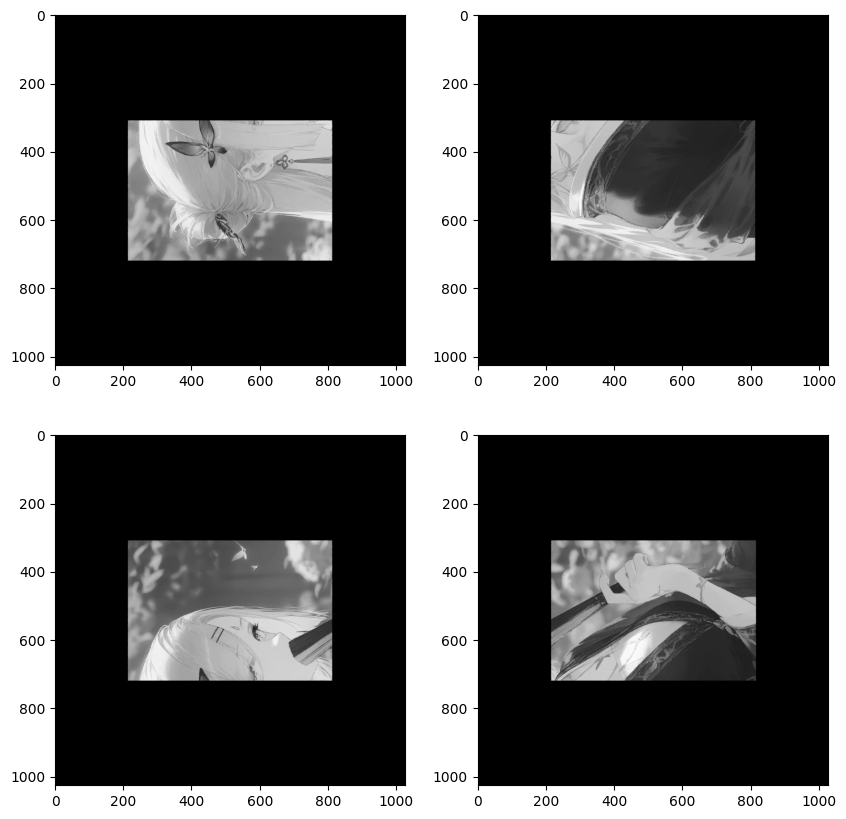

In [601]:

bagian1 = Translasi(bagian1, bagian1.shape[0]//2)
bagian2 = Translasi(bagian2, bagian1.shape[0]//2)
bagian3 = Translasi(bagian3, bagian1.shape[0]//2)
bagian4 = Translasi(bagian4, bagian1.shape[0]//2)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(bagian1, cmap='gray')
plt.subplot(222)
plt.imshow(bagian2, cmap='gray')
plt.subplot(223)
plt.imshow(bagian3, cmap='gray')
plt.subplot(224)
plt.imshow(bagian4, cmap='gray')

rotasikan lagi sebesar 90 derajat searah jarumjam

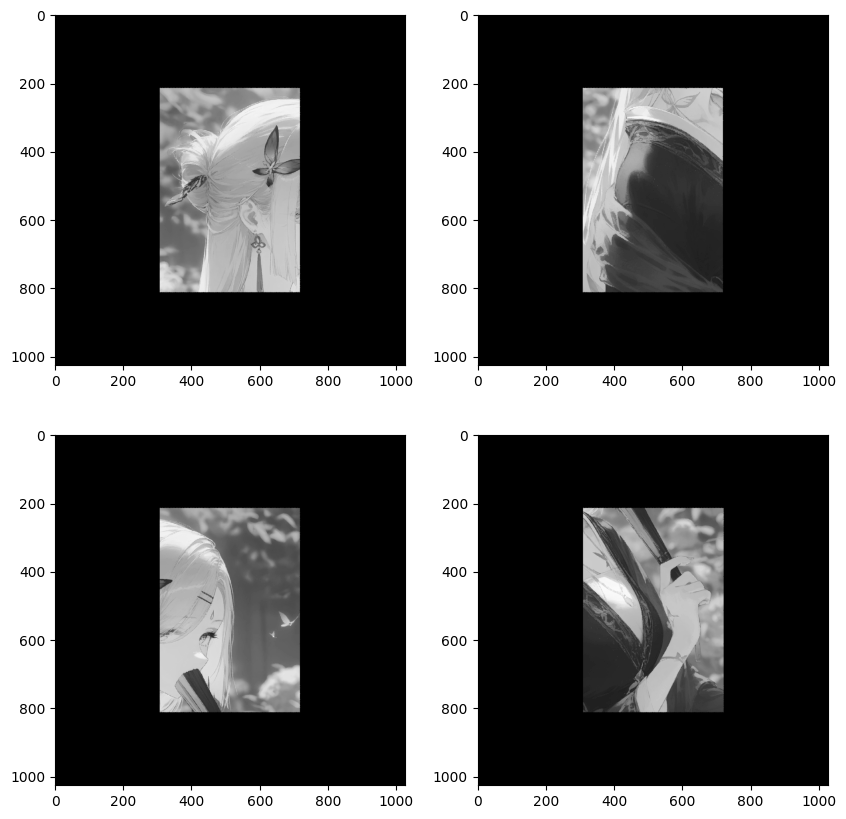

In [602]:
bagian1 = Rotasi(bagian1, -90)
bagian2 = Rotasi(bagian2, -90)
bagian3 = Rotasi(bagian3, -90)
bagian4 = Rotasi(bagian4, -90)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(bagian1, cmap='gray')
plt.subplot(222)
plt.imshow(bagian2, cmap='gray')
plt.subplot(223)
plt.imshow(bagian3, cmap='gray')
plt.subplot(224)
plt.imshow(bagian4, cmap='gray')

fungsi untuk menghilangkan bagian hitam yang ada dalam citra

In [603]:
def hasilcrp(image):
    return image[214:812, 307:718]

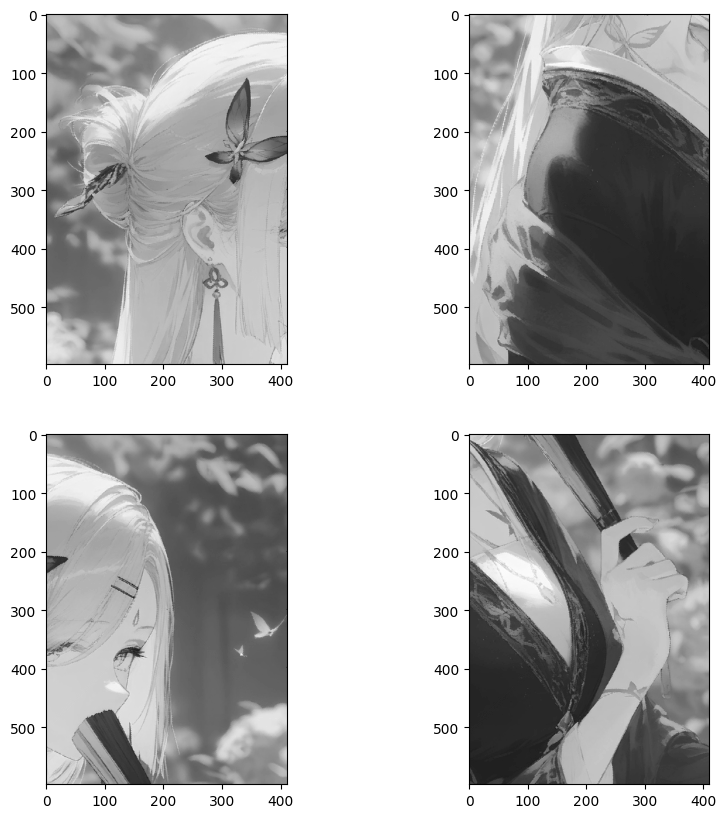

In [604]:
bagian1 = hasilcrp(bagian1)
bagian2 = hasilcrp(bagian2)
bagian3 = hasilcrp(bagian3)
bagian4 = hasilcrp(bagian4)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(bagian1, cmap='gray')
plt.subplot(222)
plt.imshow(bagian2, cmap='gray')
plt.subplot(223)
plt.imshow(bagian3, cmap='gray')
plt.subplot(224)
plt.imshow(bagian4, cmap='gray')

menampilkan semua potongan citra yang telah digabungkan dengan menukar bagian3 dengan bagian 2 

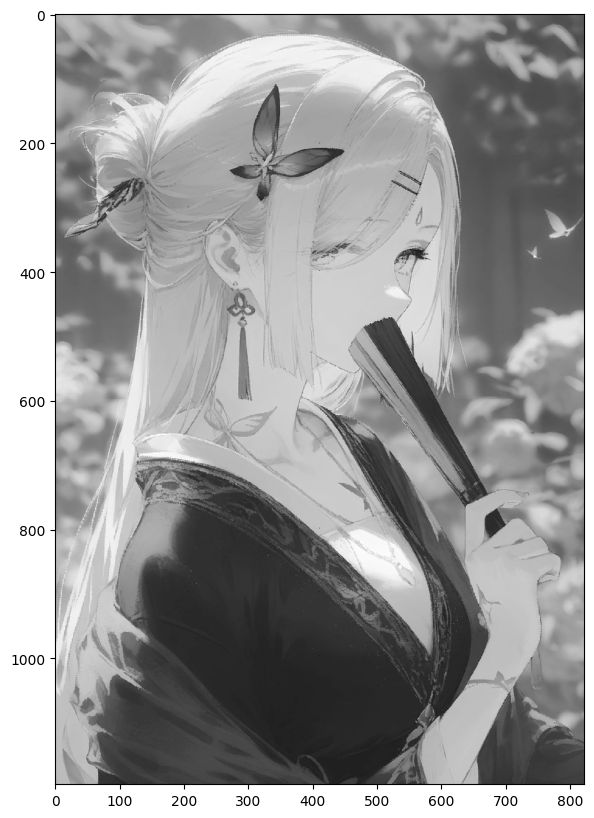

In [605]:
senheScramble = np.zeros((bagian1.shape[0]*2, bagian1.shape[1]*2)).astype(np.uint8)
senheScramble[:bagian1.shape[0], :bagian1.shape[1]] = bagian1
senheScramble[:bagian3.shape[0], bagian3.shape[1]:] = bagian3
senheScramble[bagian2.shape[0]:, :bagian2.shape[1]] = bagian2
senheScramble[bagian4.shape[0]:, bagian4.shape[1]:] = bagian4

plt.figure(figsize=(10,10))
plt.imshow(senheScramble, cmap='gray')

## melakukan proses ekualisasi dari citra senheScramble dan menampilkan hasil perbandingan histogramnya

<BarContainer object of 256 artists>

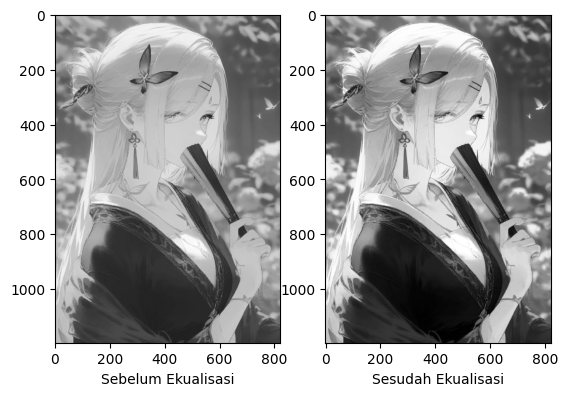

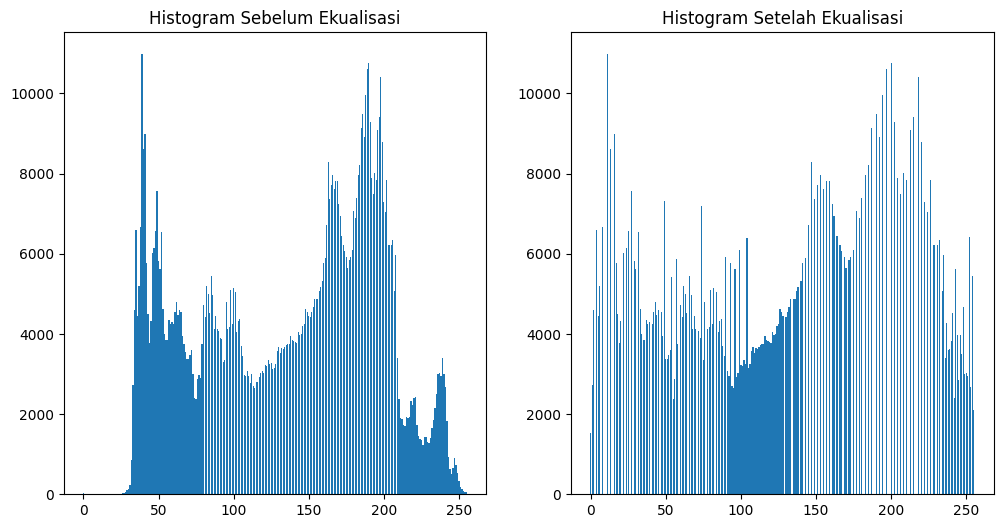

In [606]:
tg,lg = senheScramble.shape
senhegray = np.zeros(256).astype(int)
for i in range(tg):
    for j in range(lg):
        val1=senheScramble[i,j]
        senhegray[val1]+=1
senhevalue = [i for i in range(256)] 

tinggi, lebar = senheScramble.shape
histogram = np.zeros(256).astype(int)

for i in range(tinggi):
    for j in range(lebar):
        histogram[senheScramble[i,j]] +=1

gldc = np.zeros(256).astype(int)
for i in range(256):
    gldc[i]=np.sum(histogram[0:i+1])

target_value = gldc*(256-1)/(tg*lg)
target_value = np.round(target_value).astype(int)

hasilek = np.zeros(senheScramble.shape).astype(int)
for i in range(tinggi):
    for j in range(lebar):
        hasilek[i,j] = target_value[senheScramble[i,j]]

histhasil = np.zeros(256)
for i in range(tinggi):
    for j in range(lebar):
        histhasil[hasilek[i,j]] +=1

plt.subplot(121)
plt.imshow(senheScramble, cmap='gray')
plt.xlabel("Sebelum Ekualisasi")
plt.subplot(122)
plt.imshow(hasilek, cmap='gray')
plt.xlabel("Sesudah Ekualisasi")

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title("Histogram Sebelum Ekualisasi")
plt.bar(senhevalue,senhegray)
plt.subplot(122)
plt.title("Histogram Setelah Ekualisasi")
plt.bar(senhevalue,histhasil)

line diatas(senhegray) merupakan line untuk membuat histogram berdasarkan citra yang sudah ditampilkan. langkah pertama adalah membuat sebuah array dengan range sebanyak 256 dengan nilai 0 setelah itu membuat perulangan untuk mengecek tinggi dan lebar agar yang bertujuan untuk mengecek indeks dari array secara satu-persatu, pada perulangan tersebut akan otomatis menambahkan nilai +1 jika terdapat nilai yang sama pada citra. setelah indeks dijumlahkan, perlu adanya variabel untuk menampung nilai dari 0-256 dan diperlukan pembuatan fungsi untuk menjumlahkan semuanya. setelah itu histogram ditampilkan dengan line plt.bar(grayvalue, sumgray) 

line diatas(histogram,gdlc) digunakan untuk menghitung histogram citra grayscale pada variabel senhescrambel. Histogram citra grayscale menunjukkan distribusi frekuensi intensitas piksel pada citra.

Pada variabel hist diinisialisasi array hist yang berisi 256 elemen dengan nilai nol lalu menginisialisasi height dan width untuk menyimpan nilai tinggi dan lebar pada citra yang akan digunakan untuk menyimpan jumlah kemunculan setiap intensitas piksel pada citra. Kemudian, dilakukan pengulangan untuk setiap piksel pada citra untuk menghitung jumlah kemunculan intensitas piksel pada citra dan menyimpannya dalam array hist.

setelah itu membuat variabel array untuk menyimpan kumulatif dari tiap indeks citra dengan tipe data integer. setelah itu kita perlu membuat kondisi perulangan untuk mengakses tiap indeks baris pada citra dan di dalam perulangan tersebut terdapat statement yang akan menjumlahkan setiap indeks dengan seluruh indeks sebelumnya

Apabila histogram citra sebelum ekualisasi dibandingkan dengan setelah ekualisasi maka akan didapati perbedaan antara lain:
- Histogram setelah ekualisasi memiliki intensitas tinggi pada wilayah kanan (cenderung cerah).
- Pendistribusian intensitas setiap piksel lebih merata.
- Pada  piksel tertentu tidak ditemukan grafik bar. Hal ini menunjukkan kemungkinan intensitas piksel hasil ekualisasi citra bernilai 0.

## Melakukan speseifikasi citra senhe dengan target dari citra kurumin dan megumin

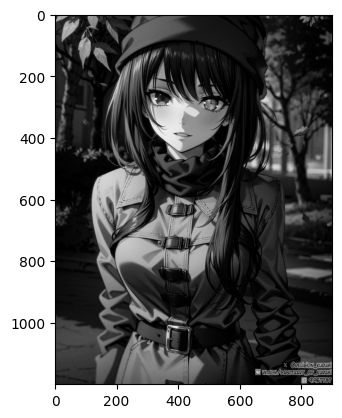

In [607]:
kurumi = plt.imread("kurumi.jpg")
gray_kurumi = cv.cvtColor(kurumi, cv.COLOR_BGR2GRAY)
plt.imshow(gray_kurumi, cmap = "gray")


mengubah citra menjadi grayscale

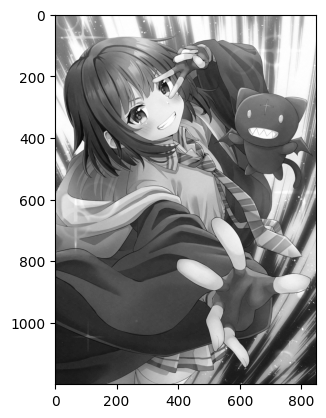

In [608]:
megumin = plt.imread("megumin.jpg")
gray_megumin = cv.cvtColor(megumin, cv.COLOR_BGR2GRAY)
plt.imshow(gray_megumin, cmap = "gray")


mengubah citra menjadi grayscale

In [609]:
def target(image, level):
    hist = np.zeros(level).astype(int)
    tinggi, lebar = image.shape
    for i in range(tinggi ):
        for j in range(lebar):
            hist[img[i,j]] +=1
    gldc = np.zeros(level).astype(int)
    for i in range(level):
            gldc[i] = np.sum( hist[0:i+1] )
    target_value = gldc*(level-1)/(tinggi*lebar)
    target_value = np.floor(target_value).astype(int)
    return target_value

inisialisasi target yang akan disepsifikasikan

In [610]:
target1a = target(hasilek, 256)
target2a = target(gray_kurumi, 256)

TypeError: 'module' object is not subscriptable

fungsi yang digunakna untuk menemukan warna dari citra target yang akan disepsifikasikan kecitra senhescrambel

In [ ]:
def color(nilai, tujuan):
    min = abs(nilai-tujuan[0])
    warna_min = 0
    for i in range(len(tujuan)):
        cheking = abs(nilai-tujuan[i])
        if(min > cheking):
            min = cheking
            warna_min = i
    return warna_min

In [ ]:
map = np.zeros(256, dtype=int)
for i in range(256):
    map[i] = color(target1a[i], target2a)

In [ ]:
hasila = np.zeros(hasilek.shape).astype(int)
for i in range(hasilek.shape[0]):
    for j in range(hasilek.shape[1]):
        hasila[i, j] = map[hasilek[i, j]]


menampilkan hasil spesifikasi dari citra

Text(0.5, 1.0, 'Sesudah Spesifikasi')

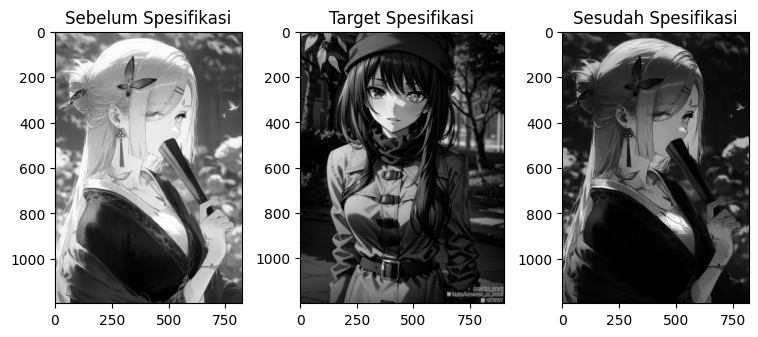

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot(3, 2, 1)
plt.imshow(hasilek, cmap='gray')
plt.title("Sebelum Spesifikasi")
plt.subplot(3, 1, 1)
plt.imshow(gray_kurumi, cmap='gray')
plt.title("Target Spesifikasi")
plt.subplot(3, 2, 2)
plt.imshow(hasila, cmap='gray')
plt.title("Sesudah Spesifikasi")

In [ ]:
target1b = target(hasilek, 256)
target2b = target(gray_megumin, 256)

TypeError: 'module' object is not subscriptable

In [ ]:
map = np.zeros(256, dtype=int)
for i in range(256):
    map[i] = color(target1b[i], target2b)

NameError: name 'target1b' is not defined

In [ ]:
hasilb = np.zeros(hasilek.shape).astype(int)
for i in range(hasilek.shape[0]):
    for j in range(hasilek.shape[1]):
        hasilb[i, j] = map[hasilek[i, j]]

Text(0.5, 1.0, 'Sesudah Spesifikasi')

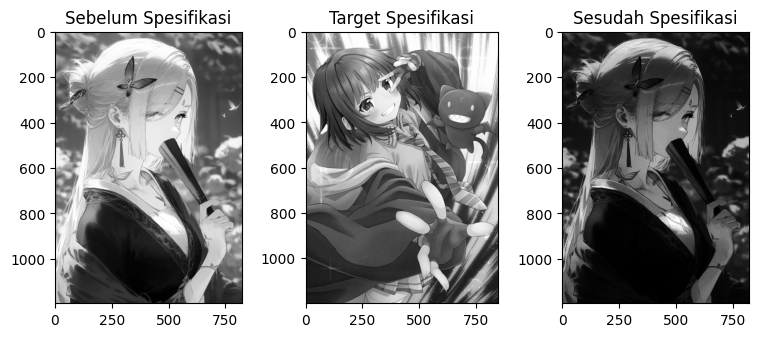

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot(3, 2, 1)
plt.imshow(hasilek, cmap='gray')
plt.title("Sebelum Spesifikasi")
plt.subplot(3, 1, 1)
plt.imshow(gray_megumin, cmap='gray')
plt.title("Target Spesifikasi")
plt.subplot(3, 2, 2)
plt.imshow(hasilb, cmap='gray')
plt.title("Sesudah Spesifikasi")